# See Readme.md for source and background

Getting started from the OSMnx examples here: https://github.com/gboeing/osmnx-examples

In [1]:
import sys
sys.executable

'/Users/Tim/miniconda3/envs/ox/bin/python'

In [2]:
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
ox.config(use_cache=True, log_console=True)
ox.__version__

'0.16.0'

In [5]:
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
ox.config(use_cache=True, log_console=True)
ox.__version__

'0.16.0'

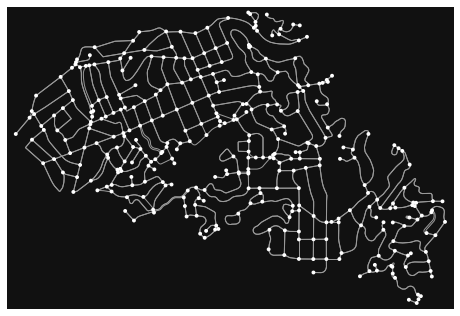

In [3]:
# get a graph for part of Olympic NP.
G = ox.graph_from_place('Piedmont, California, USA', network_type='drive')
fig, ax = ox.plot_graph(G)

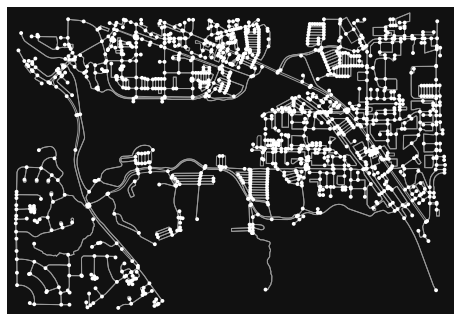

In [12]:
# Using a BBox around Marymoor Park in Redmond, WA
north = 47.673349
west = -122.132802
south = 47.655251
east = -122.092890
G = ox.graph.graph_from_bbox(north, south, east, west, network_type='bike', simplify=True, retain_all=False, truncate_by_edge=False, clean_periphery=True, custom_filter=None)
fig, ax = ox.plot_graph(G)

In [5]:
# convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, 'edge_centrality')

In [6]:
# impute missing edge speeds then calculate edge travel times
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

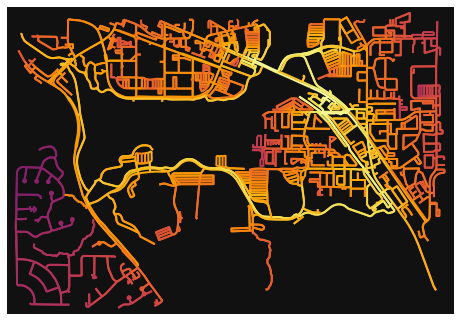

In [14]:
# color edges in original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G, 'edge_centrality', cmap='inferno')
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)

In [7]:
# get the nearest network nodes to two lat/lng points
orig = ox.get_nearest_node(G, (47.673349, -122.132802))
dest = ox.get_nearest_node(G, (47.655251, -122.092890))

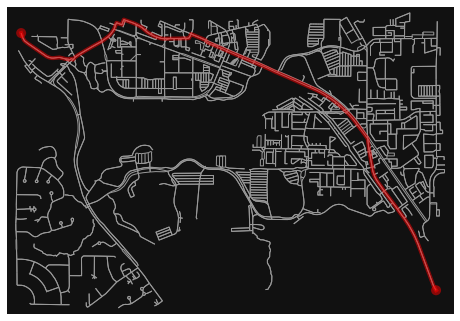

In [18]:
# find the shortest path between these nodes, minimizing travel time, then plot it
route = ox.shortest_path(G, orig, dest, weight='travel_time')
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [19]:
# pick route colors
c1 = 'r' #length
c2 = 'b' #travel_time
rc1 = [c1] * (len(route1) - 1)
rc2 = [c2] * (len(route2) - 1)
rc = rc1 + rc2
nc = [c1, c1, c2, c2]

# plot the routes
fig, ax = ox.plot_graph_routes(G, [route1, route2], route_color=rc, route_linewidth=6,
                               orig_dest_node_color=nc, node_size=0, bgcolor='k')

NameError: name 'route1' is not defined